# Deciphering Departures: Exploring Attrition Patterns in HR Analytics
### Analysis of Employee Turnover:
     
    The methodology involved cleaning and preprocessing the dataset, conducting exploratory data analysis, and data visualization techniques to extract actionable insights. The findings from this analysis offer valuable insights into the drivers of "employee turnover" within our organization, providing a foundation for developing targeted retention strategies and fostering a more supportive and engaging work environment.

    Through this project,We demonstrates the power of HR Analytics in informing strategic decision-making and driving organizational success. By understanding the dynamics of employee attrition and proactively addressing its root causes, we can cultivate a workplace culture that values and retains top talent, ultimately contributing to the long-term sustainability and growth of our company.

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("HR_Analytics.csv")
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [25]:
AttritionCount=[]
for i in df["Attrition"]:
        if i == "Yes":
            AttritionCount.append(1)
        else:
            AttritionCount.append(0)

df["AttritionCount"] = AttritionCount
df["AttritionCount"].head()

0    1
1    0
2    1
3    0
4    1
Name: AttritionCount, dtype: int64

In [26]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionCount
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,80,0,0,2,3,0,0,0,0.0,1
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,80,0,0,2,3,0,0,0,0.0,0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,80,0,0,3,3,0,0,0,0.0,1
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,80,0,0,2,3,0,0,0,0.0,0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,80,0,0,0,3,0,0,0,0.0,1


In [58]:
# Calculate the sum of AttritionCount based on EducationField
attrition_by_education = df.groupby('EducationField')['AttritionCount'].sum()
attrition_by_education.head()

EducationField
Human Resources     7
Life Sciences      89
Marketing          36
Medical            63
Other              11
Name: AttritionCount, dtype: int64

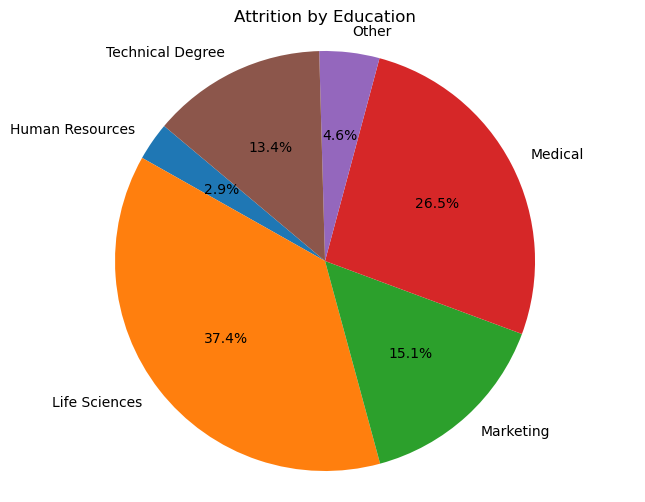

In [153]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(attrition_by_education, labels=attrition_by_education.index, autopct='%1.1f%%', startangle=140)
plt.title('Attrition by Education')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [57]:
attrition_by_age = df.groupby('AgeGroup')['AttritionCount'].sum()
attrition_by_age.head()

AgeGroup
18-25     44
26-35    116
36-45     43
46-55     27
55+        8
Name: AttritionCount, dtype: int64

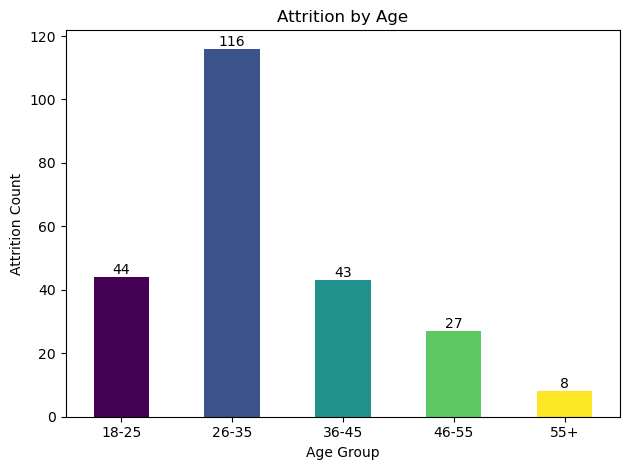

In [151]:
colors = plt.cm.viridis(np.linspace(0, 1, len(attrition_by_age)))

# Create a bar plot
attrition_by_age.plot(kind='bar',color=colors)

# Add count labels on each bar
for i, count in enumerate(attrition_by_age):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Attrition by Age')
plt.xlabel('Age Group')
plt.ylabel('Attrition Count')
plt.xticks(rotation=0)  # Rotate x-axis labels 
plt.tight_layout()

In [100]:
attrition_by_salaryslab = df.groupby("SalarySlab")["AttritionCount"].sum()
attrition_by_salaryslab.head()

SalarySlab
10k-15k     21
15k+         5
5k-10k      49
Upto 5k    163
Name: AttritionCount, dtype: int64

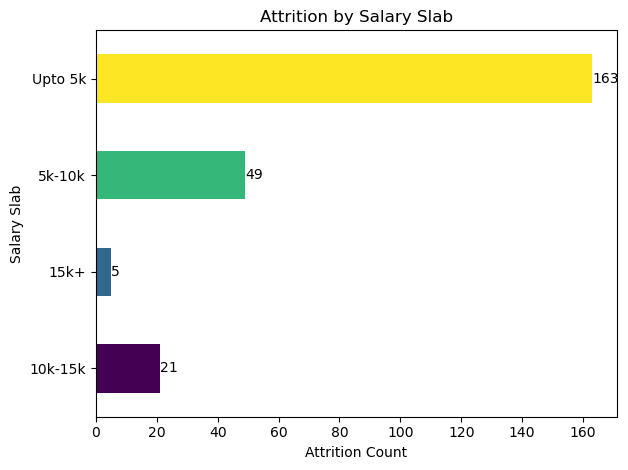

In [150]:
colors = plt.cm.viridis(np.linspace(0, 1, len(attrition_by_salaryslab)))

# Create a bar plot
attrition_by_salaryslab.plot(kind='barh',color=colors)

# Add count labels on each bar
for i, count in enumerate(attrition_by_salaryslab):
    plt.text(count, i, str(count), ha='left', va='center')

plt.title('Attrition by Salary Slab')
plt.xlabel('Attrition Count')
plt.ylabel('Salary Slab')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [147]:
attrition_by_jobrole = df.groupby("JobRole")["AttritionCount"].sum().sort_values(ascending=False).head(4)
attrition_by_jobrole

JobRole
Laboratory Technician    62
Sales Executive          58
Research Scientist       47
Sales Representative     33
Name: AttritionCount, dtype: int64

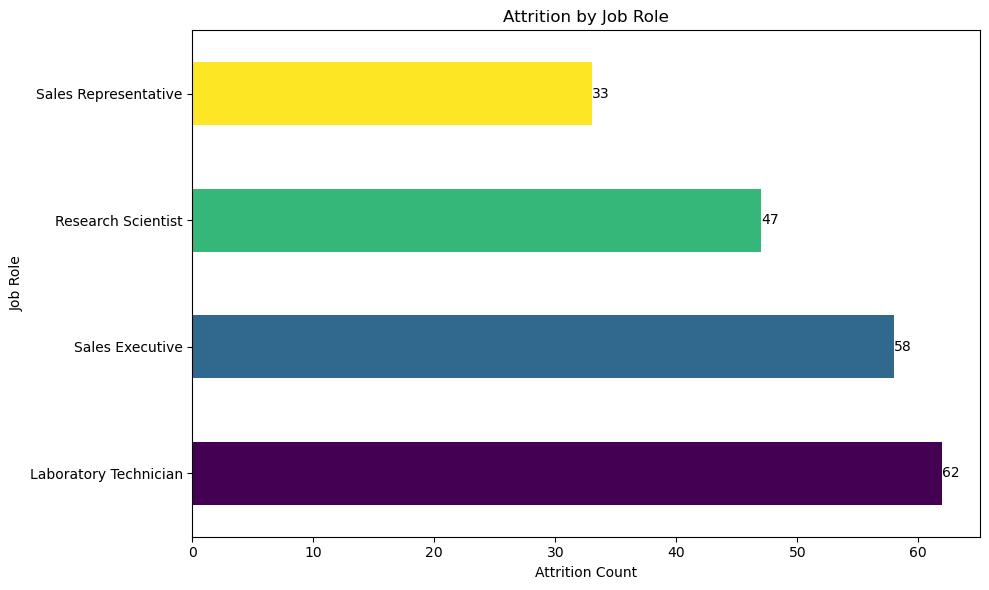

In [149]:
colors = plt.cm.viridis(np.linspace(0, 1, len(attrition_by_jobrole)))

# Create a bar plot
plt.figure(figsize=(10, 6))
attrition_by_jobrole.plot(kind='barh',color=colors)

# Add count labels on each bar
for i, count in enumerate(attrition_by_jobrole):
    plt.text(count,i, str(count), ha='left', va='center')

plt.title('Attrition by Job Role')
plt.xlabel('Attrition Count')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

In [157]:
df["JobSatisfaction"].head()

0    3
1    3
2    2
3    4
4    3
Name: JobSatisfaction, dtype: int64

In [175]:
attrition_by_satisfaction=df.groupby(["JobSatisfaction","JobRole"])["AttritionCount"].sum().to_frame().reset_index()
attrition_by_satisfaction

,JobSatisfaction,JobRole,AttritionCount
0,1,Healthcare Representative,2
1,1,Human Resources,5
2,1,Laboratory Technician,20
3,1,Manager,1
4,1,Manufacturing Director,2
5,1,Research Director,0
6,1,Research Scientist,13
7,1,Sales Executive,17
8,1,Sales Representative,7
9,2,Healthcare Representative,2


In [192]:
attrition_pivot = attrition_by_satisfaction.pivot(
        index='JobRole',
        columns='JobSatisfaction',
        values='AttritionCount'
)
attrition_pivot['Total'] = attrition_pivot.sum(axis=1)

attrition_pivot_style = attrition_pivot.style.apply(
    lambda x: ['background: lightblue' if x.name == 'Total' else '' for i in x]
)
attrition_pivot_style

JobSatisfaction,1,2,3,4,Total
JobRole,,,,,
Healthcare Representative,2,2,1,4,9
Human Resources,5,2,3,2,12
Laboratory Technician,20,8,21,13,62
Manager,1,2,1,1,5
Manufacturing Director,2,2,4,2,10
Research Director,0,1,1,0,2
Research Scientist,13,10,15,9,47
Sales Executive,17,9,18,14,58
Sales Representative,7,10,9,7,33


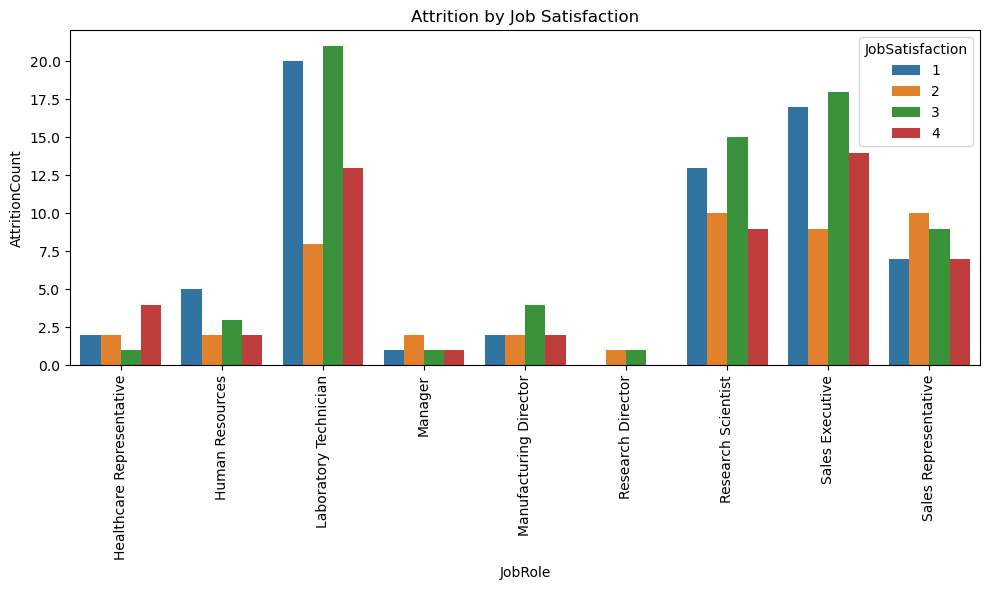

In [196]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=attrition_by_satisfaction, x='JobRole', y='AttritionCount',hue='JobSatisfaction')
plt.title('Attrition by Job Satisfaction')
plt.xticks(rotation=90)
plt.tight_layout()